In [15]:
import os
import pydicom
from matplotlib import pyplot as plt
import numpy as np
from ipywidgets import interact, IntSlider
from skimage.filters import gaussian
from skimage.exposure import equalize_adapthist
from scipy.ndimage import gaussian_filter1d

In [16]:
dcm_path = '/Users/juntangwang/Desktop/SRS00013/IMG00001.DCM'
folder_path = '/Users/juntangwang/Desktop/SRS00013/'  # Update this to the path of your DICOM folder

In [17]:
def time_to_seconds(t):
    """Converts a time string in HHMMSS.fff format to seconds."""
    hours, minutes, seconds = int(t[:2]), int(t[2:4]), float(t[4:])
    return 3600 * hours + 60 * minutes + seconds

dicom_files = [f for f in os.listdir(folder_path) if f.endswith('.DCM')]

# Initialize a list to hold your image data
image_data = []
acquisition_times = []
image_positions = []

acquisition_numbers =[]
instance_numbers = []

for file in dicom_files:
    file_path = os.path.join(folder_path, file)
    ds = pydicom.dcmread(file_path)
    
    # Preprocess the image as necessary. This is just a placeholder for any actual preprocessing you need to do.
    # For example: image = preprocess(ds.pixel_array)
    image_data.append(equalize_adapthist(gaussian(ds.pixel_array, sigma=1)))
    # image_data.append(ds.pixel_array)
    
    # Extract acquisition time; note that you'll need to adjust 'AcquisitionTime' based on your DICOM files' metadata structure
    acquisition_times.append(time_to_seconds(ds.AcquisitionTime))
    image_positions.append(ds.ImagePositionPatient)
    
    acquisition_numbers.append(ds.AcquisitionNumber)
    instance_numbers.append(ds.InstanceNumber)
    

RT: 1590
TE: 32
flip angle: 90

In [18]:
image_data = np.array(image_data)
image_positions = np.array(image_positions)
acquisition_times = np.array(acquisition_times)

# Assuming these are your original lists:
# image_data = [np.array(...) for _ in range(1000)]  # Each a 256x256 numpy array
# image_position = [np.array(...) for _ in range(1000)]  # Each a 1x3 numpy array
# acquisition_time = [np.random.rand() for _ in range(1000)]  # Each a random float

# Step 1: Combine the lists into a single list of tuples
combined = list(zip(image_data, image_positions, acquisition_times, acquisition_numbers, instance_numbers))

# combined.sort(key=lambda x: x[-1])

combined.sort(key=lambda x: x[2])
# Step 2: Sort the combined list by the image_position (assuming it's the second element of the tuple)
combined.sort(key=lambda x: x[1][1])  # Adjust the lambda function if sorting criteria are different

# Step 3: Separate the combined list back into three lists
image_data_sorted, image_position_sorted, acquisition_time_sorted, acquisition_numbers_sorted, instance_numbers_sorted = zip(*combined)

# If you need the results to be in list format instead of tuples (especially for the image data), you can convert them
image_data_sorted = list(image_data_sorted)
image_position_sorted = list(image_position_sorted)
acquisition_time_sorted = list(acquisition_time_sorted)
acquisition_numbers_sorted = list(acquisition_numbers_sorted)
instance_numbers_sorted = list(instance_numbers_sorted)

In [19]:
print(instance_numbers_sorted)

['1', '21', '41', '61', '81', '101', '121', '141', '161', '181', '201', '221', '241', '261', '281', '301', '321', '341', '361', '381', '401', '421', '441', '461', '481', '501', '521', '541', '561', '581', '601', '621', '641', '661', '681', '701', '721', '741', '761', '781', '801', '821', '841', '861', '881', '901', '921', '941', '961', '981', '2', '22', '42', '62', '82', '102', '122', '142', '162', '182', '202', '222', '242', '262', '282', '302', '322', '342', '362', '382', '402', '422', '442', '462', '482', '502', '522', '542', '562', '582', '602', '622', '642', '662', '682', '702', '722', '742', '762', '782', '802', '822', '842', '862', '882', '902', '922', '942', '962', '982', '3', '23', '43', '63', '83', '103', '123', '143', '163', '183', '203', '223', '243', '263', '283', '303', '323', '343', '363', '383', '403', '423', '443', '463', '483', '503', '523', '543', '563', '583', '603', '623', '643', '663', '683', '703', '723', '743', '763', '783', '803', '823', '843', '863', '883', '9

In [20]:
print(acquisition_numbers_sorted)

['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23

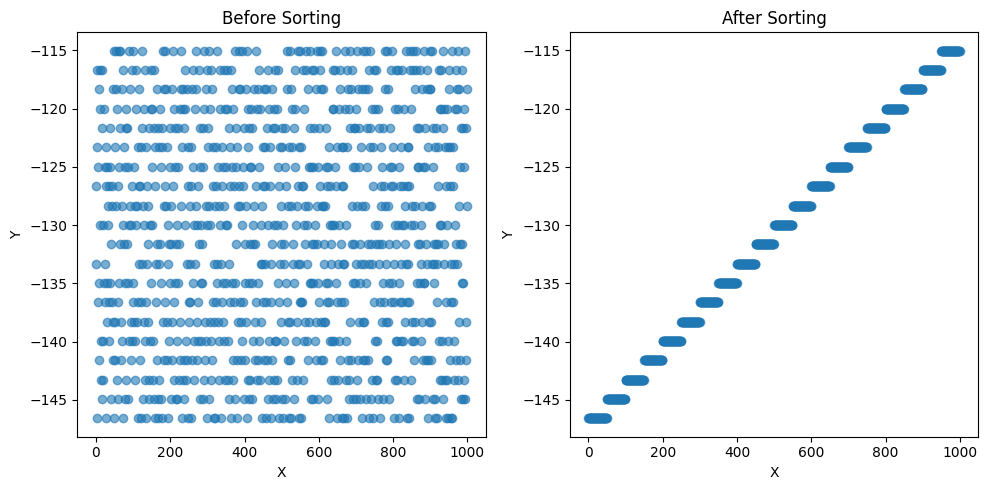

In [21]:
a = []
for i in range(len(image_data_sorted)):
    a.append(i)
    
a = np.asarray(a)
# Assuming image_position and image_position_sorted are your original and sorted position lists respectively

# Convert lists to numpy arrays for easier slicing
original_positions = np.array(image_positions)
sorted_positions = np.array(image_position_sorted)

# Before sorting
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.scatter(a[:], original_positions[:, 1], alpha=0.6)
plt.title('Before Sorting')
plt.xlabel('X')
plt.ylabel('Y')

# After sorting
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.scatter(a[:], sorted_positions[:, 1], alpha=0.6)
plt.title('After Sorting')
plt.xlabel('X')
plt.ylabel('Y')

plt.tight_layout()
plt.show()

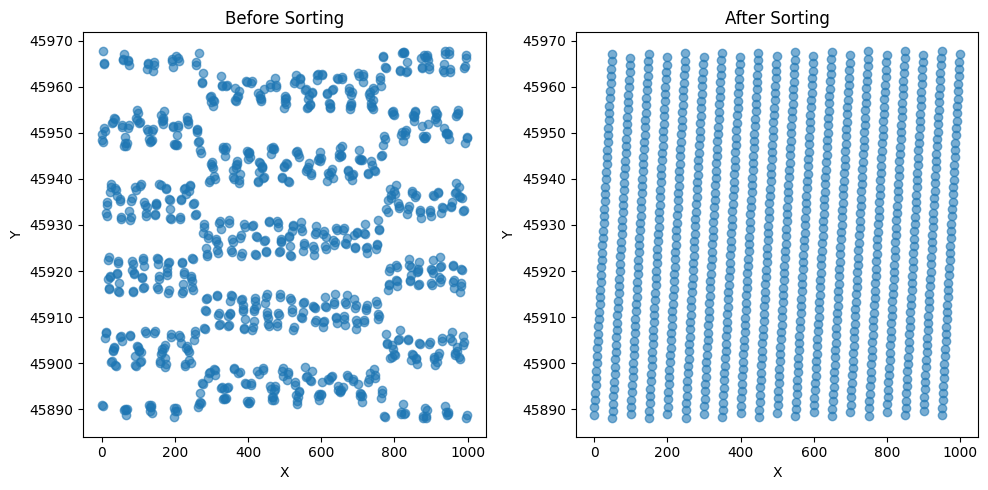

In [22]:
a = []
for i in range(len(image_data_sorted)):
    a.append(i)
    
a = np.asarray(a)
# Assuming image_position and image_position_sorted are your original and sorted position lists respectively

# Convert lists to numpy arrays for easier slicing
original_positions = np.array(acquisition_times)
sorted_positions = np.array(acquisition_time_sorted)

# Before sorting
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.scatter(a[:], original_positions[:], alpha=0.6)
plt.title('Before Sorting')
plt.xlabel('X')
plt.ylabel('Y')

# After sorting
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.scatter(a[:], sorted_positions[:], alpha=0.6)
plt.title('After Sorting')
plt.xlabel('X')
plt.ylabel('Y')

plt.tight_layout()
plt.show()

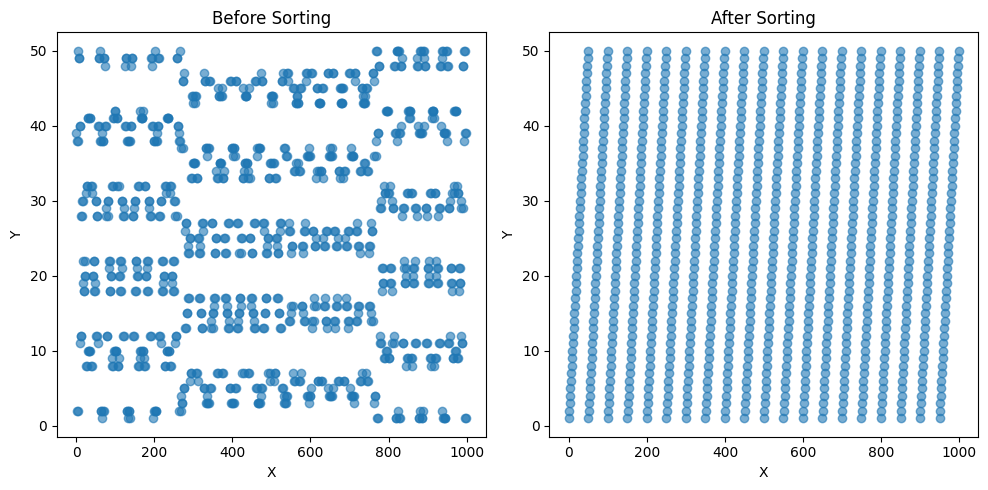

In [23]:
a = []
for i in range(len(image_data_sorted)):
    a.append(i)
    
a = np.asarray(a)
# Assuming image_position and image_position_sorted are your original and sorted position lists respectively

# Convert lists to numpy arrays for easier slicing
original_positions = np.array(acquisition_numbers)
sorted_positions = np.array(acquisition_numbers_sorted)

# Before sorting
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.scatter(a[:], original_positions[:], alpha=0.6)
plt.title('Before Sorting')
plt.xlabel('X')
plt.ylabel('Y')

# After sorting
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.scatter(a[:], sorted_positions[:], alpha=0.6)
plt.title('After Sorting')
plt.xlabel('X')
plt.ylabel('Y')

plt.tight_layout()
plt.show()

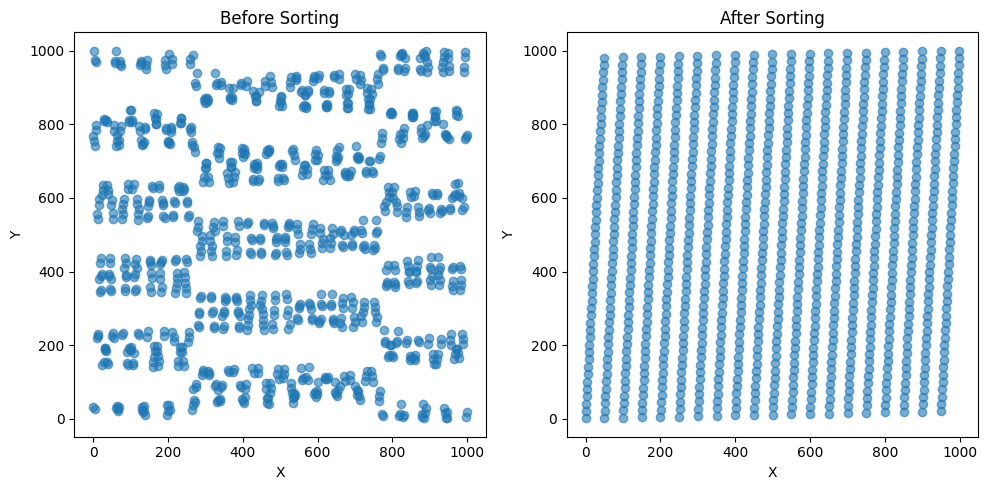

In [24]:
a = []
for i in range(len(image_data_sorted)):
    a.append(i)
    
a = np.asarray(a)
# Assuming image_position and image_position_sorted are your original and sorted position lists respectively

# Convert lists to numpy arrays for easier slicing
original_positions = np.array(instance_numbers)
sorted_positions = np.array(instance_numbers_sorted)

# Before sorting
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.scatter(a[:], original_positions[:], alpha=0.6)
plt.title('Before Sorting')
plt.xlabel('X')
plt.ylabel('Y')

# After sorting
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.scatter(a[:], sorted_positions[:], alpha=0.6)
plt.title('After Sorting')
plt.xlabel('X')
plt.ylabel('Y')

plt.tight_layout()
plt.show()

In [59]:
def intensity_to_concentration(intensity, baseline=None):
    
    if baseline is None:
        baseline = np.average(intensity[6:8]) #TODO: Baseline modeling
    
    # Placeholder values for demonstration
    te = 32  # Echo time in milliseconds (ms)
    s0 = baseline  # Baseline signal intensity before contrast injection
    st = intensity  # Signal intensity at different times after contrast injection

    # Calculating contrast agent concentration using the provided formula
    ct = (1/te) * np.log(st/s0)
    return ct

In [60]:
def plt_point(x,y,z,view=False):
    times = acquisition_time_sorted[50*(z-1):50*z]-acquisition_time_sorted[50*(z-1)]
    concentrations = intensity_to_concentration(image_data_sorted[50*(z-1):50*z,x,y])
    if view:
        print("InstanceNumbers: ")
        print(instance_numbers_sorted[50*(z-1):50*z])
        print("AcquisitionNumbers: ")
        print(acquisition_numbers_sorted[50*(z-1):50*z])
        print("unique image_positions: ")
        print(np.unique(image_position_sorted[50*(z-1):50*z]))
    
    # Assuming 'concentration' and 'time_points' are your data arrays
    plt.figure(figsize=(10, 6))
    plt.plot(times, concentrations, '-o', label='Concentration over Time')
    plt.title(f'Concentration vs. Time at <{x},{y},{z}>*\n*: not exact position, x,y is pixel index & z is slice index')
    plt.xlabel('Time Point (s)')
    plt.ylabel('Concentration')
    plt.legend()
    plt.grid(True)
    plt.show()

In [61]:
# Assuming 'image_series' is a 4D numpy array [time, z, x, y]
# where 'time' is the 4th dimension (different acquisition times)

image_data_sorted = np.array(image_data_sorted)

# Interactive visualization of 3D data over time
def explore_3dimage_time(i=0,z=0,x=0,y=0,vis=False,aif=False):
    if vis:
        i = (z-1)*50+i
        plt.figure(figsize=(10, 5))
        plt.imshow(image_data_sorted[i, :, :], cmap='gray')  # Adjust the 15 here to show different slices
        plt.title(f'#: {instance_numbers_sorted[i]} Position: {image_position_sorted[i]} \n T#: {acquisition_numbers_sorted[i]} Time: {acquisition_time_sorted[i]}')
        plt.axis('off')
        plt.scatter(x, y, color='red', s=10)  # Highlight the point
        plt.show()
    if aif: 
        plt_point(x,y,z)

# Create a slider to move through time
interact(explore_3dimage_time, 
         i=IntSlider(min=0, max=49, step=1, value=0), 
         z=IntSlider(min=1,max=20,step=1, value=1),
         x=IntSlider(min=0, max=256, step=1),
         y=IntSlider(min=0, max=256, step=1),
         vis=True,
         aif=True)


interactive(children=(IntSlider(value=0, description='i', max=49), IntSlider(value=1, description='z', max=20,…

<function __main__.explore_3dimage_time(i=0, z=0, x=0, y=0, vis=False, aif=False)>

C(t) =(1/TE)*ln(S(t)/S0), where TE is the echo time, S(t) is the signal intensity at each timepoint during the gamma fitting period and S0 is the average baseline signal intensity

In [67]:
def smooth_data_gaussian(data, sigma=5):
    """
    Smooths the data using a Gaussian filter.

    :param data: The input data to smooth.
    :param sigma: The standard deviation for the Gaussian kernel.
    :return: The smoothed data.
    """
    return gaussian_filter1d(data, sigma)

def plt_pointss(xyztuples=None, view=False, smooth=True):
    if xyztuples is None:
        xyztuples = [(0, 0, 0)]
    plt.figure(figsize=(10, 6))
    
    for i, (x, y, z) in enumerate(xyztuples):
        times = acquisition_time_sorted[50*(z-1):50*z] - acquisition_time_sorted[50*(z-1)]
        concentrations = intensity_to_concentration(image_data_sorted[50*(z-1):50*z,x,y])
        
        # Smooth the concentration data using Gaussian filter
        if smooth:
            smoothed_concentrations = smooth_data_gaussian(concentrations)
        else:
            smoothed_concentrations = concentrations.copy()

        if view:
            print(f"Data for {x},{y},{z}")
            print("InstanceNumbers: ")
            print(instance_numbers_sorted[50*(z-1):50*z])
            print("AcquisitionNumbers: ")
            print(acquisition_numbers_sorted[50*(z-1):50*z])
            print("unique image_positions: ")
            print(np.unique(image_position_sorted[50*(z-1):50*z]))
            print()  # Print a newline for readability
        
        plt.plot(times, smoothed_concentrations, '-o', label=f'<{x},{y},{z}>')
    
    plt.title('Smoothed Concentration vs. Time for Multiple Points\n*: not exact position, x,y is pixel index & z is slice index')
    plt.xlabel('Time Point (s)')
    plt.ylabel('Concentration')
    plt.legend()
    plt.grid(True)
    plt.show()

# Example usage:
# xyztuples = [(x1, y1, z1), (x2, y2, z2), ...]
# plt_points(xyztuples, view=True)

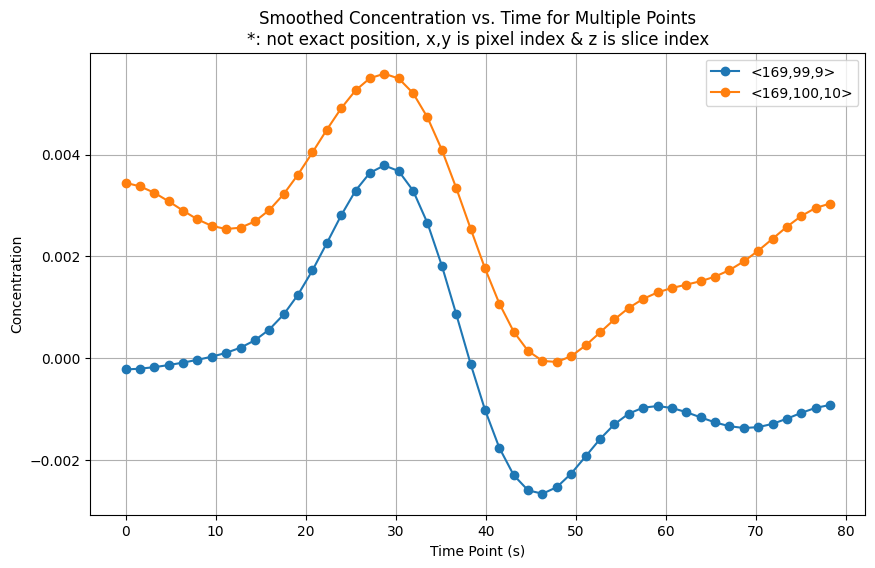

In [66]:
xyztuples = [(169,99,9),
            (169,100,10)]
plt_pointss(xyztuples)

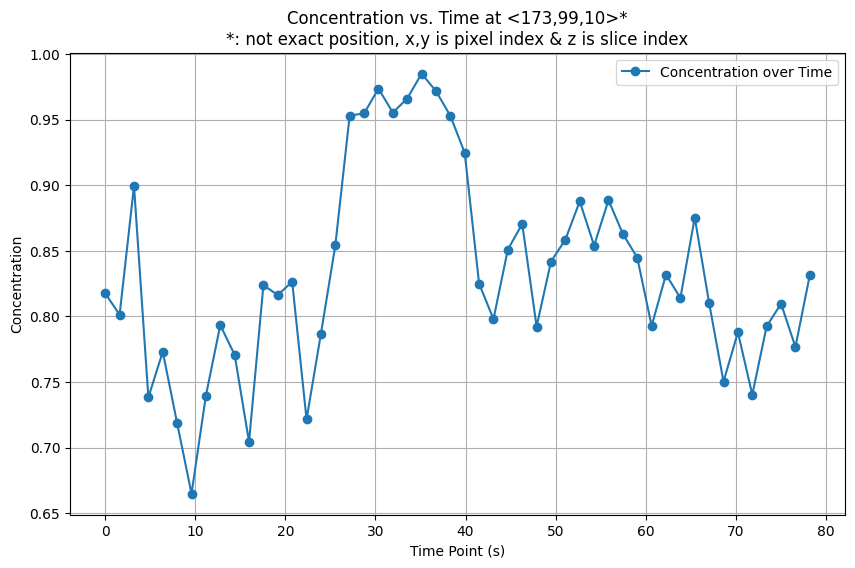

In [28]:
plt_point(173,99,10)

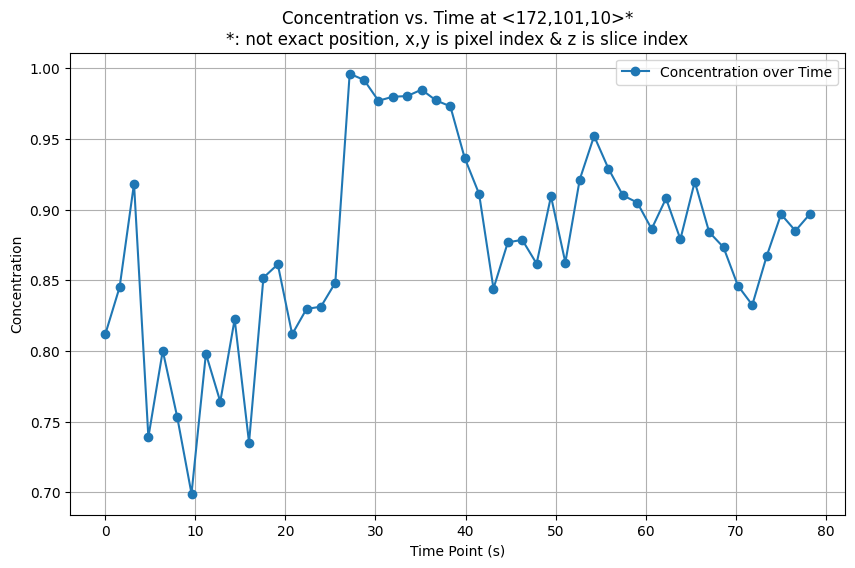

In [27]:
plt_point(172,101,10)

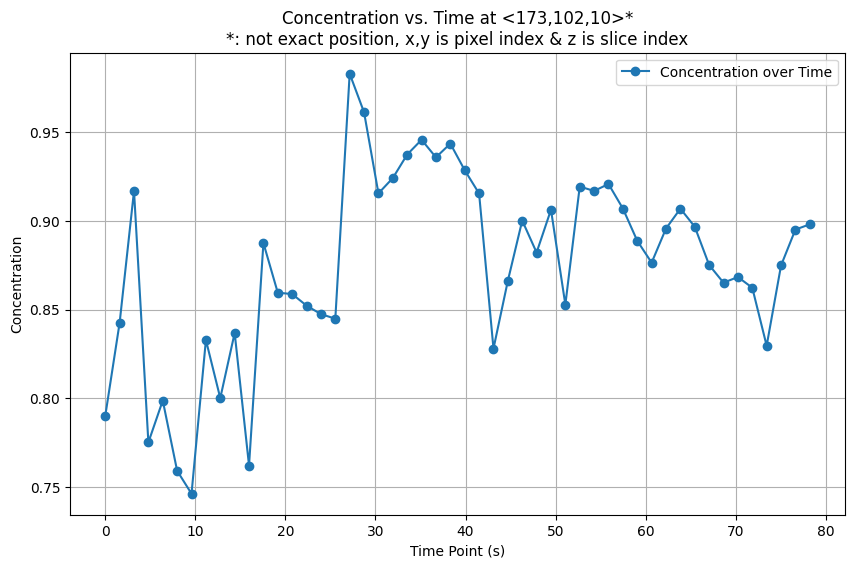

In [28]:
plt_point(173,102,10)